In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch

In [ ]:
Data = pd.read_csv("/content/crime_data.csv")
Data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
Data.duplicated().sum()

0

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
Data1 = Data.iloc[:,1:]
Data1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
Data2 = Data1.copy()

In [ ]:
Norm_Data = pd.DataFrame(normalize(Data2),columns = Data2.columns)
Norm_Data

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


Now, the data is Normalize. So, we start Clustring

# K-Means Clustring

In [ ]:
WCSS = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters = i, random_state = 48)
    Kmeans.fit(Norm_Data)
    WCSS.append(Kmeans.inertia_)
WCSS

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[1.9452076233849003,
 0.7540963759591797,
 0.3278478050693132,
 0.22760245765174872,
 0.16628246699707278,
 0.12189729452276521,
 0.09861877942595958,
 0.08800664163209598,
 0.07688667868335416,
 0.06508278499101502]

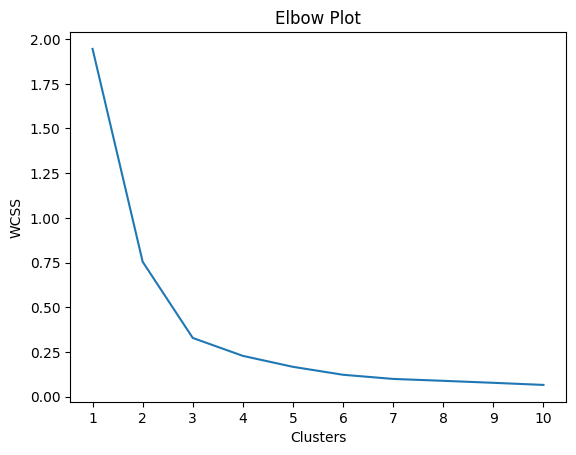

In [ ]:
#Elbow Plot
plt.plot(range(1,11),WCSS)
plt.title("Elbow Plot")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.xticks(range(1,11))
plt.show()

In [ ]:
Clusters = KMeans(4,random_state = 48)
Clusters.fit(Norm_Data)
Clusters.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 3, 0, 1, 2, 1, 3, 0, 1, 0, 1, 0,
       2, 0, 3, 3, 1, 0, 2, 1, 0, 0, 0, 2, 1, 3, 3, 1, 3, 0, 3, 0, 3, 1,
       1, 3, 3, 3, 2, 3], dtype=int32)

In [ ]:
Data2["Cluster"] = Clusters.labels_
Data2

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [ ]:
Data2.groupby("Cluster").agg(["mean"]).reset_index()

,Cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.021053,260.526316,66.421053,27.694737
1,1,4.881818,111.363636,68.545455,16.354545
2,2,2.616667,54.833333,62.000000,12.333333
3,3,6.542857,145.285714,63.500000,20.107143


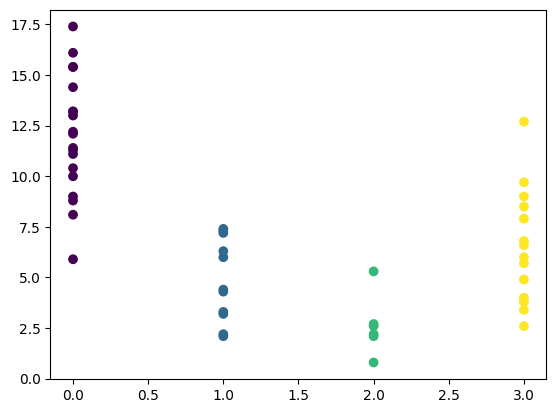

In [ ]:
plt.scatter(Data2["Cluster"],Data2["Murder"],c = Clusters.labels_)

In [ ]:
Clusters.inertia_

0.22760245765174872

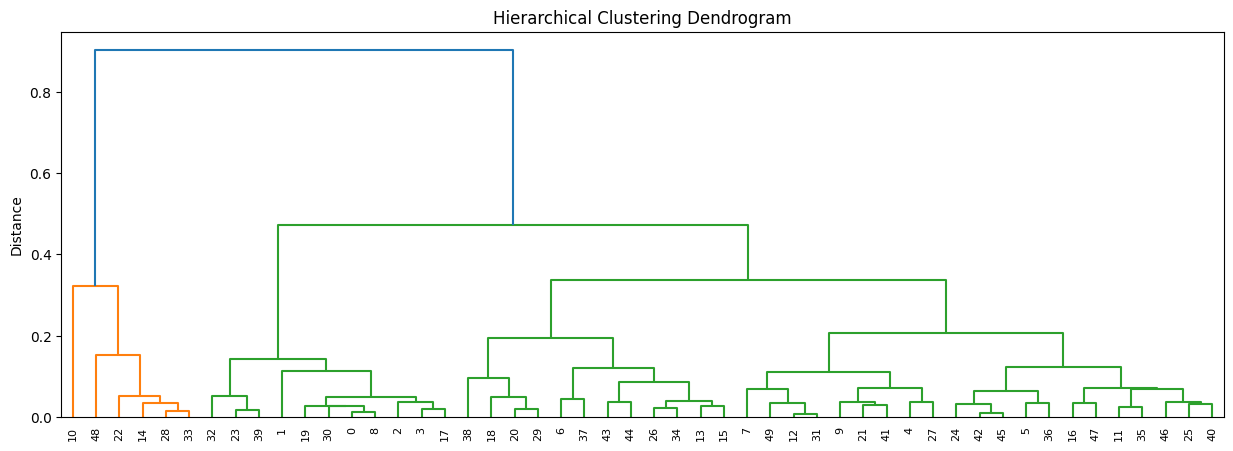

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(sch.linkage(Norm_Data, method='complete',metric='euclidean'))

In [ ]:
Data3 = Data1.copy()

In [ ]:
HC = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "complete")
HC.fit(Norm_Data)
HC.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 4, 0, 0, 1, 3, 1, 0, 2, 1, 2, 1, 0,
       3, 2, 0, 0, 1, 0, 3, 1, 2, 0, 2, 3, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1,
       1, 0, 0, 0, 3, 0])

In [ ]:
Data3["Cluster"] = HC.labels_
Data3

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [ ]:
Data3.groupby("Cluster").agg("mean").reset_index()

,Cluster,Murder,Assault,UrbanPop,Rape
0,0,8.547619,180.142857,67.047619,24.452381
1,1,4.758333,116.583333,70.083333,15.683333
2,2,12.463636,275.181818,59.636364,25.990909
3,3,2.080000,56.600000,57.800000,10.760000
4,4,5.300000,46.000000,83.000000,20.200000


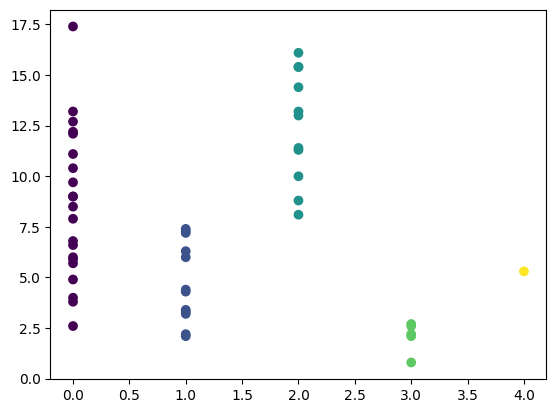

In [ ]:
plt.scatter(Data3["Cluster"],Data3["Murder"],c = HC.labels_)

# DBSCAN Clustering

In [ ]:
Data4 = Data1.copy()
Data4.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [ ]:
DBSCAN = DBSCAN(eps = 0.08, min_samples = 4)
DBSCAN.fit(Norm_Data)

DBSCAN(eps=0.08, min_samples=4)

In [ ]:
DBSCAN.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0])

In [ ]:
Data4["Cluster"] = DBSCAN.labels_

In [ ]:
Data4.groupby("Cluster").agg("mean").reset_index()

,Cluster,Murder,Assault,UrbanPop,Rape
0,-1,5.966667,120.666667,65.666667,25.166667
1,0,8.458140,184.790698,66.441860,21.932558
2,1,1.950000,57.500000,55.750000,10.750000


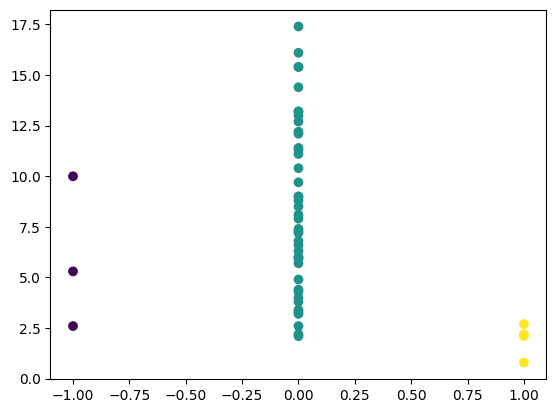

In [ ]:
plt.scatter(Data4['Cluster'],Data4['Murder'],c= DBSCAN.labels_)